# Redes de Hopfield

## Ejercicio 1

Implemente la arquitectura para una red recurrente de Hopfield con su entrenmiento hebbino y pruébela con los patrones que se meustran en la siguiente figura.

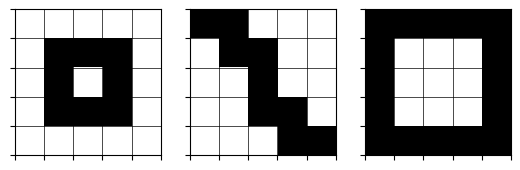

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_bitmap(vec, ax, N=None):
    """
    Display a 1D array of length N^2 as an N x N black/white bitmap.

    vec         : 1D array-like; values can be 0/1, bool, or any numeric.
    N           : side length. If None, inferred as sqrt(len(vec)).
    threshold   : if not None, binarize by vec > threshold.
    invert      : if True, flips 0<->1.
    """
    vec = np.asarray(vec)
    if vec.ndim != 1:
        raise ValueError("vec must be 1D")

    if N is None:
        N = int(np.sqrt(vec.size))
    if N * N != vec.size:
        raise ValueError(f"Length {vec.size} is not a perfect square (N^2).")

    img = vec.reshape(N, N)

    img = 1 - (img if img.max() <= 1 else img / img.max())

    # Force black/white rendering
    ax.set_xticks(np.arange(0, N+1, 1))
    ax.set_yticks(np.arange(0, N+1, 1))
    ax.set_aspect("equal")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(img, cmap='gray', vmin=0, vmax=1, interpolation='nearest', origin='upper', extent=[0, N, 0, N])
    ax.grid(which="both", color="black", linewidth=0.5)

x1 = np.array([
    0, 0, 0, 0, 0,
    0, 1, 1, 1, 0,
    0, 1, 0, 1, 0,
    0, 1, 1, 1, 0,
    0, 0, 0, 0, 0,
])
x2 = np.array([
    1, 1, 0, 0, 0,
    0, 1, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 1, 0,
    0, 0, 0, 1, 1,
])
x3 = np.array([
    1, 1, 1, 1, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,
])

fig, ax = plt.subplots(1,3)

show_bitmap(x1,ax[0])
show_bitmap(x2,ax[1])
show_bitmap(x3,ax[2])

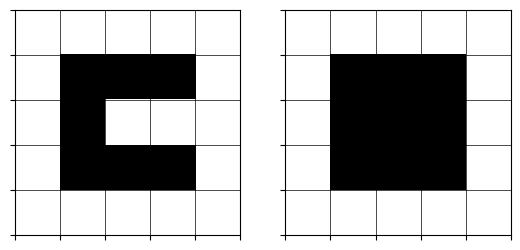

In [24]:
import Hopfield
# Almacenar patrones
hopfield = Hopfield.Hopfield()
hopfield.entrenar(np.array([x1,x2,x3]))

# generar imagen aleatoria
rng = np.random.default_rng()
x = rng.integers(0, 1, 25, dtype=int, endpoint=True)
x = np.array([
    0, 0, 0, 0, 0,
    0, 1, 1, 1, 0,
    0, 1, 0, 0, 0,
    0, 1, 1, 1, 0,
    0, 0, 0, 0, 0,
])
y = hopfield.recuperar(x)

fig, ax = plt.subplots(1,2)
show_bitmap(x,ax[0])
show_bitmap(y,ax[1])